# Môn: Phân tích dữ liệu
# Lớp: IE224.O11
# Nhóm: 4
# Đề tài: 
### &nbsp;&nbsp;&nbsp;&nbsp;Kiểm định giá của bất động sản tại khu vực TP.HCM
# Thành viên nhóm:
### &nbsp;&nbsp;&nbsp;&nbsp;1. Nguyễn Viết Công - 21520657
### &nbsp;&nbsp;&nbsp;&nbsp;2. Phạm Thanh Đạt - 21520710
### &nbsp;&nbsp;&nbsp;&nbsp;3. Lê Văn Cao Kỳ - 21521046
### &nbsp;&nbsp;&nbsp;&nbsp;4. Đinh Công Thiện - 21522617

In [1455]:
from typing import Sequence, Literal, Callable, Any, Tuple
import joblib
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

Load bộ dữ liệu thô

In [1456]:
df = pd.read_csv(
    "./batdongsan_com_vn.csv",
    names=["_id", "title", "url", "verified", "publishDate", "dueDate", "newsRank", "businessForm", "city", "district", "street", "category", "description", "projectTitle", "projectUnitPrice", "projectArea", "projectBuildings", "projectInvestor", "latitude", "longitude", "area", "price", "frontLength", "entranceLength", "facingDir", "balconyDir", "floor", "bedroom", "wc", "legalStatus", "furniture"]
)

Demo bộ dữ liệu

In [1457]:
df.head()

,_id,title,url,verified,publishDate,dueDate,newsRank,businessForm,city,district,street,category,description,projectTitle,projectUnitPrice,projectArea,projectBuildings,projectInvestor,latitude,longitude,area,price,frontLength,entranceLength,facingDir,balconyDir,floor,bedroom,wc,legalStatus,furniture
0,38349090,Bán cắt lỗ căn 2N1Wc 60m2 tại Vinhomes Ocean P...,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,1.0,18/10/2023,25/10/2023,Tin VIP Kim Cương,Bán,Hà Nội,Gia Lâm,Vinhomes Ocean Park Gia Lâm,Căn hộ chung cư,Tôi chính chủ cần bán căn hộ loại 2 phòng ngủ ...,Vinhomes Ocean Park Gia Lâm,"49,06 - 49,06 triệu/m²",NaN,66.0,Tập đoàn Vingroup,21.002415,105.964111,54 m²,"1,75 tỷ",NaN,NaN,Đông - Nam,Tây - Bắc,NaN,2.0,1.0,Sổ đỏ/ Sổ hồng,Đầy đủ
1,38333507,"Chính chủ - Nhà hẻm 618 CMT8 Quận 3, sổ hồng 8...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,1.0,17/10/2023,01/11/2023,Tin VIP Kim Cương,Bán,Hồ Chí Minh,Quận 3,đường Cách Mạng Tháng Tám,Nhà riêng,"Bán nhà trệt, hẻm 618 Cách Mạng Tháng Tám phườ...",NaN,NaN,NaN,NaN,NaN,10.786322,106.665912,83 m²,"9,5 tỷ","6,5 m",NaN,Tây - Bắc,NaN,NaN,2.0,2.0,Sổ đỏ/ Sổ hồng,NaN
2,38330652,"Chính chủ bán nhà sổ hồng, đẹp - nhà kiến trúc...",https://batdongsan.com.vn/ban-nha-rieng-duong-...,1.0,16/10/2023,26/10/2023,Tin VIP Kim Cương,Bán,Hồ Chí Minh,Bình Thạnh,đường Phan Văn Trị,Nhà riêng,Chính chủ bán nhà đẹp - nhà kiến trúc sư thiết...,NaN,NaN,NaN,NaN,NaN,10.820181,106.694719,"42,2 m²","6,95 tỷ","3,4 m","2,5 m",Tây - Nam,Tây - Nam,5.0,2.0,3.0,Sổ đỏ/ Sổ hồng,Cơ bản
3,38310577,Chính chủ bán đất 2 mặt tiền 81m2 mặt đường Đa...,https://batdongsan.com.vn/ban-dat-duong-da-sy-...,1.0,13/10/2023,23/10/2023,Tin VIP Kim Cương,Bán,Hà Nội,Hà Đông,đường Đa Sỹ,Bán đất,"- Địa chỉ: Mặt đường Đa Sỹ, P. Kiến Hưng, Q. H...",NaN,NaN,NaN,NaN,NaN,20.959258,105.785736,81 m²,"9,9 tỷ",4 m,NaN,Đông,NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng.,NaN
4,38135951,"Đất thổ cư TX52, khu dân cư hiện hữu P. Thạnh ...",https://batdongsan.com.vn/ban-dat-duong-thanh-...,1.0,19/10/2023,03/11/2023,Tin VIP Vàng,Bán,Hồ Chí Minh,Quận 12,đường Thạnh Xuân 52,Bán đất,"Đất thổ cư TX52, khu dân cư hiện hữu P. Thạnh ...",NaN,NaN,NaN,NaN,NaN,10.893666,106.682694,115 m²,34 triệu/m²,4 m,8 m,Bắc,NaN,NaN,NaN,NaN,Sổ đỏ/ Sổ hồng,NaN


In [1458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11554 entries, 0 to 11553
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               11554 non-null  int64  
 1   title             11554 non-null  object 
 2   url               11554 non-null  object 
 3   verified          8336 non-null   float64
 4   publishDate       11554 non-null  object 
 5   dueDate           11554 non-null  object 
 6   newsRank          11554 non-null  object 
 7   businessForm      11554 non-null  object 
 8   city              11550 non-null  object 
 9   district          11554 non-null  object 
 10  street            11554 non-null  object 
 11  category          11554 non-null  object 
 12  description       11554 non-null  object 
 13  projectTitle      3174 non-null   object 
 14  projectUnitPrice  1549 non-null   object 
 15  projectArea       707 non-null    object 
 16  projectBuildings  1327 non-null   float6

#### Mô tả bộ dữ liệu: Tin đăng bất động sản (bđs)
- `_id`: ID của tin đăng.
- `title`: Tiêu đề của tin đăng.
- `url`: Đường dẫn đến tin đăng.
- `verified`: Tin đăng đã được xác thực chưa (1/0).
- `publishDate`: Ngày đăng tin.
- `dueDate`: Ngày hết hạn tin đăng.
- `newsRank`: Cấp của tin đăng.
- `businessForm`: Hình thức kinh doanh của bđs.
- `city`: Thành phố mà bđs trực thuộc.
- `district`: Quận/huyện mà bđs trực thuộc.
- `street`: Tên đường mà bđs trực thuộc.
- `category`: Loại bđs.
- `description`: Mô tả của tin đăng.
- `projectTitle`: Tên dự án mà bđs thuộc về.
- `projectUnitPrice`: Giá đơn vị (/tháng hoặc /$m^2$) của dự án mà bđs thuộc về.
- `projectArea`: Diện tích của dự án mà bđs thuộc về.
- `projectBuildings`: Số tòa nhà của dự án mà bđs thuộc về.
- `projectInvestor`: Nhà đầu tư của dự án mà bđs thuộc về.
- `latitude`: Vĩ độ của bđs.
- `longitude`: Kinh độ của bđs.
- `area`: Diện tích của bđs.
- `price`: Giá của bđs.
- `frontLength`: Độ dài mặt tiền của bđs.
- `entranceLength`: Độ dài lối vào bđs.
- `facingDir`: Hướng nhà của bđs.
- `balconyDir`: Hướng ban công của bđs.
- `floor`: Số lầu của bđs.
- `bedroom`: Số phòng ngủ của bđs.
- `wc`: Số nhà vệ sinh của bđs.
- `legalStatus`: Tình trạng pháp lý của bđs.
- `furniture`: Nội thất của bđs.

Khởi tạo một Pipeline

In [1459]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([])

Abstract class cho các bước thuộc `sklearn.pipeline.Pipeline`

In [1460]:
from abc import ABC
from sklearn.base import BaseEstimator, TransformerMixin
from numpy.typing import ArrayLike

class BaseCustomPipelineStep(ABC, BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()

    def fit(
        self, 
        X: pd.DataFrame, 
        y: pd.DataFrame | ArrayLike | None = None
    ):
        return self

    def transform(
        self,
        X: pd.DataFrame,
        y: pd.DataFrame | ArrayLike | None = None
    ):
        raise NotImplementedError(f"transform method must be implemented for class {self.__class__}")

### Validating

Loại bỏ tất cả tin đăng có `category` "Bán đất" nhưng có giá trị của các biến `balconyDir`, `bedroom`, `floor`, `wc`

In [1461]:
class RemoveFakeLand(BaseCustomPipelineStep):
    def __init__(self, cols_to_consider: ArrayLike) -> None:
        self.cols_to_consider = cols_to_consider

    def transform(self, X: pd.DataFrame):
        return X[
            ~X[self.cols_to_consider].notna().any(axis=1) |
            ~(X["category"] == "Bán đất")
        ]

pipeline.steps.append(
    ("rm_fake_land", RemoveFakeLand(["balconyDir", "bedroom", "floor", "wc"]))
)

### Preprocessing

Các hàm hỗ trợ xử lý

In [1462]:
def map_cols(
    df: pd.DataFrame,
    cols: str | Sequence[str],
    callback: Callable,
    na_action: Literal["ignore"] | None = "ignore"
):
    '''
    **Mô tả:** ánh xạ các cột trong DataFrame theo một phép biến hình `callback`

    **Đối số:**
    1. `df`: DataFrame
    2. `cols`: (Các) cột cần ánh xạ
    3. `callback`: Phép biến hình $f(x) \rightarrow y$
    4. `na_action`: Chế độ xử lí NaN
        - "ignore": Giữ nguyên giá trị NaN (Mặc định)
        - None: Xử lý theo phép biến hình
    '''
    if type(cols) == str:
        cols = (cols,)
    for col in cols:
        df[col] = df[col].map(callback, na_action=na_action)
    return df

In [1463]:
def map_unit(
    df: pd.DataFrame,
    cols: str | Sequence[str],
    unit_mapper: dict[str, float],
    quantity_mapper: Callable = None,
    na_action: Literal["ignore"] | None = "ignore"
):
    '''
    **Mô tả:** ánh xạ từ giá trị dạng chuỗi sang dạng số trong các cột thuộc DataFrame.

    **Đối số:**
    1. `df`: DataFrame
    2. `cols`: (Các) cột cần ánh xạ.
    3. `unit_mapper`: Phép ánh xạ đơn vị về định lượng.
    4. `quantity_mapper`: Hàm số ánh xạ định lượng dạng chuỗi về dạng số (Mặc định None: f(x) -> float(x))
    5. `na_action`: Chế độ xử lí NaN
        - "ignore": Giữ nguyên giá trị NaN (Mặc định)
        - None: Xử lý theo phép biến hình
    '''
    def map_callback(x: str):
        if type(x) != str:
            return x
        
        try:
            quantity, unit = x.rsplit(maxsplit=1)
        except:
            raise ValueError(f"The value {x} format requirement is not met")
        
        for key, val in unit_mapper.items():
            if key in unit:
                quantity_val = quantity_mapper(quantity) if quantity_mapper \
                    else float(quantity.replace(".", "").replace(",", "."))
                return quantity_val * val
    
    return map_cols(df, cols=cols, callback=map_callback, na_action=na_action)

In [1464]:
import re
def interval_quant_mapper(x: str):
    '''
    **Mô tả:** ánh xạ từ khoảng định lượng dạng chuỗi sang dạng số.

    **Đối số:**
    1. `x`: Chuỗi có dạng "<mốc dưới> - <mốc trên>"
    '''
    lower, upper = re.search(r"(\d+(?:,\d+)?)\s?[-–]\s?(\d+(?:,\d+)?)", x).groups()
    lower = float(lower.replace(".", "").replace(",", "."))
    upper = float(upper.replace(".", "").replace(",", "."))
    return (lower + upper) / 2

In [1465]:
def map_keyword(
    df: pd.DataFrame,
    cols: str | Sequence[str],
    category_keywords_mapper: dict[str, Sequence[str]],
    nomatch_value: Any = np.nan
):
    '''
    **Mô tả:** ánh xạ từ giá trị dạng chuỗi theo giá trị phân loại theo keyword trong các cột thuộc DataFrame
    
    **Đối số:**
    1. `df`: DataFrame
    2. `cols`: (Các) cột cần ánh xạ
    3. `category_keywords_mapper`: Các cặp giá trị (category, các keywords)
        - Note: category phía trên đã khớp thì không xử lý các category dưới.
    4. `nomatch_value`: Giá trị mặc định khi chuỗi không thuộc category nào. (Mặc định NaN)
    '''
    def map_callback(x: str):
        if type(x) != str:
            return x
        
        lower_mapper = {
            cat: tuple(str.lower(kw) for kw in kws)
            for cat, kws in category_keywords_mapper.items()
        }

        for category, kws in lower_mapper.items():
            lower_x = str.lower(x)
            if any(str.lower(kw) in lower_x for kw in kws):
                return category
        return nomatch_value
        
    return map_cols(df, cols=cols, callback=map_callback)

In [1466]:
def handle_low_freq(
    df: pd.DataFrame,
    by: str, 
    min_freq: int,
    independently_by: str = None,
    action: Literal["remove", "as_other"] = "remove"
):
    '''
    **Mô tả:** xử lý những mẫu có giá trị biến thuộc tần suất thấp

    **Đối số:**
    1. `df`: DataFrame
    2. `by`: Tên biến cần tính tần suất
    3. `min_freq`: Ngưỡng tần suất thấp nhất để giữ lại các mẫu
    4. `separating_category`: Xét riêng lẻ trên các giá trị của biến phân loại
    5. `action`: Hành động áp dụng lên các mẫu thuộc phân loại tần suất thấp
        - "remove": Loại bỏ mẫu.
        - "as_other": Gom thành phân loại `other` mới.
    '''
    groups = df.groupby(
        [by, independently_by] if independently_by is not None \
            else by, 
        observed=True
    )
    low_freq_indices = groups[by].transform('count').lt(min_freq)
    
    if action == "remove":
        df = df.loc[~low_freq_indices]
    elif action == "as_other":
        if df[by].dtype == 'category' and "other" not in df[by].cat.categories:
            df.loc[:, by] = df[by].cat.add_categories("other")
        df.loc[low_freq_indices, by] = "other"
    
    if df[by].dtype == "category":
        df.loc[:, by] = df[by].cat.remove_unused_categories()

    return df

In [1467]:
def as_other(
    df: pd.DataFrame,
    by: str,
    categories: str | Sequence[str]
):
    '''
    **Mô tả:** chuyển đổi (các) giá trị phân loại của một biến thành "other"

    **Đối số:**
    1. `df`: DataFrame
    2. `by`: Tên biến cần chuyển giá trị
    3. `categories`: (Các) giá trị phân loại cần chuyển thành "other"
    '''
    if type(categories) == str:
        categories = (categories,)
        
    if df[by].dtype == 'category' and not "other" in df[by].cat.categories:
        df[by] = df[by].cat.add_categories("other")
    
    for category in categories:
        is_cat = df[by] == category
        df.loc[is_cat, by] = "other"
        if df[by].dtype == 'category':
            df[by] = df[by].cat.remove_categories(category)
    return df

Theo như đề tài, chỉ xét các bđs thuộc TP.HCM

In [1468]:
class DataFrameTransformer(BaseCustomPipelineStep):
    def __init__(
        self, 
        filter_callback: Callable[[pd.DataFrame], pd.DataFrame]
    ) -> None:
        self.filter_callback = filter_callback

    def transform(self, X: pd.DataFrame):
        return self.filter_callback(X)

In [1469]:
def in_hcmc(df: pd.DataFrame):
    lon = df["longitude"]
    lat = df["latitude"]

    cond = (
        (df["city"] == "Hồ Chí Minh") &
        (106.364025 <= lon) & (lon <= 107.024861) &
        (10.376486 <= lat) & (lat <= 11.159832)
    )
    return df[cond]

pipeline.steps.append(
    ("in_hcmc", DataFrameTransformer(in_hcmc))
)

Loại bỏ các biến:
- `_id`: Không có giá trị.
- `title`: Không đủ khả năng phân tích.
- `url`: Không có giá trị.
- `city`: Đã sàng lọc.
- `description`: Không đủ khả năng phân tích.

In [1470]:
class DropNoUseCols(BaseCustomPipelineStep):
    def __init__(self, cols_to_drop: ArrayLike) -> None:
        self.cols_to_drop = cols_to_drop
        
    def transform(self, X: pd.DataFrame):
        return X.drop(columns=self.cols_to_drop)

pipeline.steps.append(
    ("no_use_cols", DropNoUseCols(["_id", "title", "url", "city", "description"]))
)

#### `verified`

In [1471]:
from numpy import ndarray
from scipy.sparse import spmatrix
from sklearn.impute import SimpleImputer

class DataFrameSimpleImputer(SimpleImputer):
    def __init__(
        self, 
        *,
        cols: str | Sequence[str],
        indices_callback: Callable[[pd.DataFrame], pd.Series] = None,
        fit_by_indices: bool = True,
        missing_values: float | str | int | None = np.nan,
        strategy: str = "mean",
        fill_value: float | str | int | None = None,
        copy: bool = True,
        add_indicator: bool = False,
        keep_empty_features: bool = False
    ):
        self.cols = [cols] if type(cols) == str else cols
        self.indices_callback = indices_callback
        self.fit_by_indices = fit_by_indices
        super().__init__(missing_values=missing_values, strategy=strategy, fill_value=fill_value, copy=copy, add_indicator=add_indicator, keep_empty_features=keep_empty_features)
    
    def fit(self, X: pd.DataFrame):
        indices = self.indices_callback(X) \
                    if self.indices_callback and self.fit_by_indices \
                    else np.full(X[self.cols].shape[:1], True)
        super().fit(X.loc[indices, self.cols])
        return self

    def transform(self, X: pd.DataFrame) -> ndarray | spmatrix:
        df = X.copy()
        indices = self.indices_callback(X) \
                    if self.indices_callback \
                    else np.full(X[self.cols].shape[:1], True)
        df.loc[indices, self.cols] = super().transform(df.loc[indices, self.cols])
        return df

Chuyển giá trị nan của biến `verified` thành 0

In [1472]:
pipeline.steps.append(
    ("correct_verified", DataFrameSimpleImputer(cols="verified", strategy="constant", fill_value=0))
)

In [1473]:
class ColumnUnitMapper(BaseCustomPipelineStep):
    def __init__(
        self, 
        cols: str | Sequence[str],
        unit_mapper: dict[str, float],
        quantity_mapper: Callable = None,
        na_action: Literal["ignore"] | None = "ignore"
    ) -> None:
        self.cols = cols
        self.unit_mapper = unit_mapper
        self.quantity_mapper = quantity_mapper
        self.na_action = na_action

    def transform(self, X: pd.DataFrame):
        return map_unit(
            X.copy(), cols=self.cols,
            unit_mapper=self.unit_mapper,
            quantity_mapper=self.quantity_mapper,
            na_action=self.na_action
        )

In [1474]:
class ColumnAreaUnitMapper(BaseCustomPipelineStep):
    def __init__(
        self, 
        cols: str | Sequence[str],
        unit_mapper: dict[str, float],
        area_col: str = "area",
        quantity_mapper: Callable | None = None,
        na_action: Literal["ignore"] | None = "ignore"
    ) -> None:
        self.cols = (cols,) if type(cols) == str else cols
        self.unit_mapper = unit_mapper
        self.area_col = area_col
        self.quantity_mapper = quantity_mapper
        self.na_action = na_action
    
    def transform(self, X: pd.DataFrame):
        _X = X.copy()
        for col in self.cols:
            on_area = _X[col].str.contains("m²")
            _X = map_unit(
                _X, cols=col,
                unit_mapper=self.unit_mapper,
                quantity_mapper=self.quantity_mapper,
                na_action=self.na_action
            )
            
            _X[col] = [
                quantity * area if should_handle else quantity
                for quantity, area, should_handle in zip(_X[col], _X[self.area_col], on_area)
            ]
        return _X

#### `area`

Các giá trị xuất hiện trong biến `area`

In [1475]:
df["area"].unique()

array(['54 m²', '83 m²', '42,2 m²', ..., '1.580 m²', '1.991 m²',
       '156,7 m²'], dtype=object)

Chuyển giá trị biến `area` thành dạng số (theo $m^2$)

In [1476]:
pipeline.steps.append(
    ("map_area", ColumnUnitMapper(
        cols="area",
        unit_mapper={
            "m²": 1,
            "km²": 1e6
        }
    ))
)

#### `price`

Các giá trị xuất hiện trong biến `price`

In [1477]:
df["price"].unique()[:12]

array(['1,75 tỷ', '9,5 tỷ', '6,95 tỷ', '9,9 tỷ', '34 triệu/m²', '4,1 tỷ',
       '2,35 tỷ', '21,5 tỷ', '5,6 tỷ', '40 tỷ', '16 tỷ', '3,45 tỷ'],
      dtype=object)

Chuyển giá trị biến `price` thành dạng số (theo tỷ) và loại bỏ các giá trị khuyết

In [1478]:
def map_price(df: pd.DataFrame):
    on_area = df["price"].str.contains("m²")
    df = map_unit(
        df, cols="price",
        unit_mapper={
            "tỷ": 1,
            "triệu": 1e-3,
            "nghìn": 1e-6
        }
    )

    df["price"] = [
        price * area if should_handle else price
        for price, area, should_handle in zip(df["price"], df["area"], on_area)
    ]
    df = df.dropna(subset="price")
    return df

pipeline.steps.append(
    ("map_price", DataFrameTransformer(map_price))
)

In [1479]:
def log_transform_price(df: pd.DataFrame):
    _df = df.copy()
    _df["price"] = np.log(_df["price"])
    return _df

pipeline.steps.append(
    ("log_transform_price", DataFrameTransformer(log_transform_price))
)

#### `projectTitle`

Biến `projectTitle` sẽ không được sử dụng, thay vào đó ta tạo một biến mới `isInProject` cho biết bđs có thuộc một dự án nào đó không

In [1480]:
class AsNotNAMapper(BaseCustomPipelineStep):
    def __init__(
        self,
        rename_mapper: dict[str, str]
    ) -> None:
        self.rename_mapper = rename_mapper
    
    def transform(self, X: pd.DataFrame):
        for col in self.rename_mapper.keys():
            X[col] = X[col].notna().astype(np.int8)
        return X.rename(columns=self.rename_mapper)
    
pipeline.steps.append(
    ("replace_projectTitle_isInProject", AsNotNAMapper({"projectTitle": "isInProject"}))
)

#### `projectUnitPrice`

Các giá trị xuất hiện trong biến `projectUnitPrice`

In [1481]:
df["projectUnitPrice"].unique()

array(['49,06 - 49,06 triệu/m²', nan, '24,65 - 24,65 triệu/m²',
       '20,92 - 20,92 triệu/m²', '14 - 14 triệu/m²',
       '64,88 - 64,88 triệu/m²', '215 - 215 triệu/m²', '83 - 83 triệu/m²',
       '11 - 13 triệu/tháng', '71,23 - 83,47 triệu/tháng',
       '33,7 - 62,6 triệu/tháng', '6,2 - 10,37 triệu/tháng',
       '31,4 - 68 triệu/tháng', '12 - 15 triệu/tháng',
       '99,48 - 136,72 triệu/tháng', '19,3 - 28,35 triệu/tháng',
       '60 - 60 triệu/m²', '18 - 52,08 triệu/tháng',
       '2,64 - 2,64 triệu/m²'], dtype=object)

Chuyển giá trị biến `projectUnitPrice` thành dạng số (theo tỷ)

In [1482]:
pipeline.steps.append(
    ("map_projectUnitPrice", ColumnAreaUnitMapper(
        cols="projectUnitPrice",
        unit_mapper={
            "tỷ": 1,
            "triệu": 1e-3,
            "nghìn": 1e-6
        },
        quantity_mapper=interval_quant_mapper
    ))
)

#### `projectArea`

Các giá trị xuất hiện trong biến `projectArea`

In [1483]:
df["projectArea"].unique()[:30]

array([nan, '53-86 m²', '63-400 m²', '48-117 m²', '61 - 198 m²',
       '80-187 m²', '63-83 m²', '50-184 m²', '28 - 76  m²', '69-103 m²',
       '68-161 m²', '42-77 m²', '52 - 133 m²', '45-100 m²', '28 – 98 m²',
       '27-127 m²', '56-162 m²', '63-115 m²', '68-220 m²', '50-106 m²',
       '58-125 m²', '80-320 m²', '93-580 m²', '79-112 m²', '122-300 m²',
       '80-242 m²', '71-92 m²', '34-57 m²', '25-82 m²', '80-154 m²'],
      dtype=object)

Chuyển giá trị biến `projectArea` thành dạng số (theo $m^2$)

In [1484]:
pipeline.steps.append(
    ("map_projectArea", ColumnUnitMapper(
        cols="projectArea",
        unit_mapper={
            "m²": 1,
            "km²": 1e6
        },
        quantity_mapper=interval_quant_mapper
    ))
)

#### `frontLength, entranceLength`

Các giá trị xuất hiện trong biến `frontLength, entranceLength`

In [1485]:
print(f"frontLength: {df['frontLength'].unique()[:20]}")
print(f"entranceLength: {df['entranceLength'].unique()[:20]}")

frontLength: [nan '6,5 m' '3,4 m' '4 m' '8 m' '4,5 m' '5 m' '25 m' '3,5 m' '5,5 m'
 '10 m' '100 m' '6 m' '7 m' '6,1 m' '9,11 m' '25,5 m' '3 m' '150 m' '20 m']
entranceLength: [nan '2,5 m' '8 m' '6 m' '7 m' '30 m' '2 m' '12 m' '5 m' '11 m' '19 m'
 '20 m' '10 m' '9 m' '39 m' '13 m' '22 m' '4 m' '50 m' '18,5 m']


Chuyển giá trị biến `frontLength, entranceLength` thành dạng số (theo $m$)

In [1486]:
pipeline.steps.append(
    ("map_frontLength_entranceLength", ColumnUnitMapper(
        cols=["frontLength", "entranceLength"],
        unit_mapper={
            "m": 1,
            "km": 1e3
        }
    ))
)

In [1487]:
class CategoryKeywordMapper(BaseCustomPipelineStep):
    def __init__(
        self, 
        cols: str | Sequence[str],
        cat_kw_mapper: dict[str, str]
    ) -> None:
        self.cols = cols
        self.cat_kw_mapper = cat_kw_mapper
    
    def transform(self, X: pd.DataFrame):
        return map_keyword(
            X, cols=self.cols,
            category_keywords_mapper=self.cat_kw_mapper
        )

#### `legalStatus`

Các giá trị xuất hiện trong biến `legalStatus`

In [1488]:
df["legalStatus"].unique()

array(['Sổ đỏ/ Sổ hồng', 'Sổ đỏ/ Sổ hồng.', nan,
       'Sổ đỏ chính chủ sẵn sàng giao dịch.', 'Đã có sổ đỏ',
       'Đang chờ sổ. HĐMB', 'Sổ đỏ', 'Sổ hồng', 'Sổ đỏ.',
       'Sổ hồng chính chủ.',
       'Sổ Hồng cá nhân + full SKC 30 năm + ngành nghề SX Gỗ -',
       'Hợp đồng mua bán', 'Sổ đỏ chính chủ, không dính quy hoạch',
       'Đang chờ sổ', 'Sổ hồng, sổ đỏ.', 'Hợp đồng mua bán.',
       'Sổ Hồng riêng', 'Đã có sổ.', 'Hợp đồng đặt cọc', 'Đã có sổ Hồng',
       'Đã có sổ', 'Đã có sổ hồng.', 'Full thổ cư, đã có sổ.',
       'Đứng tên sổ hồng chính chủ', 'Đã có sổ đỏ.', 'Sổ đỏ đã có',
       'Đã có sổ hồng riêng', 'Đã có sổ hồng', 'Sổ đỏ/ sổ hồng',
       'Sổ đỏ lâu dài.', 'Đầy đủ', 'Sổ Hồng',
       'Sổ đỏ mới tinh sẵn công chứng', 'Có sổ', 'Sổ hồng riêng',
       'Sổ riêng', 'Sổ hồng sang tên ngay', 'Sổ hồng riêng hoàn công',
       'Sổ đỏ/ sổ hồng.', 'HĐMB.', 'HĐMB', 'SHR', 'Có sổ.',
       'Sổ đỏ cá nhân', 'Sổ chính chủ.', 'Sổ hồng riêng chính chủ',
       'Sổ hồng riêng hoàn 

Nhìn chung, `legalStatus` có thể được chia như sau:
| Cấp độ | Tên          | Keywords                  |
|--------|--------------|---------------------------|
|    1   | Đang chờ sổ  | "chờ"                     |
|    2   | Sổ hoàn công | "hoàn công"               |
|    3   | Sổ đỏ/hồng   | "đỏ", "hồng", "có", "sẵn" |

In [1489]:
pipeline.steps.append(
    ("map_legalStatus", CategoryKeywordMapper("legalStatus", {
        "Sổ đỏ/hồng": ("đỏ", "hồng", "có", "sẵn"),
        "Sổ hoàn công": ("hoàn công",),
        "Đang chờ sổ": ("chờ",)
    }))
)

#### `furniture`

Các giá trị xuất hiện trong biến `furniture`

In [1490]:
df["furniture"].unique()

array(['Đầy đủ', nan, 'Cơ bản', 'Cơ bản.', 'Đầy đủ.', 'Thô',
       'Nội thất bàn giao nhập khẩu Hafele, Duravit, Bravat, điều hoà âm trần Multi.',
       'Thông sàn.', 'Nội thất hiện đại cao cấp.',
       'Nội thất nguyên bản chủ đầu tư.', 'Không nội thất.', 'Tặng đồ.',
       'Full nội thất 5 sao.', 'Nội thất đầy đủ, cao cấp.',
       'Nội thất đầy đủ',
       'Nội thất CĐT: 3 điều hòa, nóng lạnh và thiết bị vệ sinh.',
       'Đây đủ nội thất', 'Không nội thất', 'Cao cấp.',
       'Nội thất: Bàn giao nguyên bản chủ đầu tư.', 'Cao cấp',
       'Full nội thất.', 'Full đồ.', 'Hoàn thiện thô bên trong.', 'Full.',
       'Hoàn thiện mặt ngoài thô bên trong hình thật 100%',
       'Hoàn thiện ngoài và thô bên trong.', 'Nội thất nguyên bản.',
       'Tặng hết nội thất', 'Nội thất cao cấp',
       'Cơ bản nội thất sang trọng (1 tivi, 2 máy lạnh, 1 tủ lạnh, 1 máy giặt).',
       'Hoàn thiện mặt ngoài thô bên trong.', 'Full nội thất cao cấp',
       'Nội thất cao cấp.', 'Nội thất như hìn

Nhìn chung, `furniture` có thể được chia như sau:
| Cấp độ | Tên     | Keywords               |
|--------|---------|------------------------|
|    1   | Không   | "không", "thô"         |
|    2   | Cơ bản  | "cơ bản", "có"         |
|    3   | Đầy đủ  | "đầy đủ", "đủ", "full" |
|    4   | Cao cấp | "cao cấp"              |

In [1491]:
pipeline.steps.append(
    ("map_furniture", CategoryKeywordMapper("furniture", {
        "Cao cấp": ("cao cấp",),
        "Đầy đủ": ("đầy đủ", "đủ", "full"),
        "Cơ bản": ("cơ bản", "căn bản", "có"),
        "Không": ("không", "ko", "thô")
    }))
)

#### Chuyển kiểu của biến

Thay đổi thành giá trị datetime của các biến:
- `publishDate`
- `dueDate`

Và sắp xếp các mẫu theo thời gian đăng tin.

In [1492]:
class AsDateTimeMapper(BaseCustomPipelineStep):
    def __init__(
        self, 
        col_formats: dict[str, str]
    ) -> None:
        self.col_formats = col_formats
    
    def transform(self, X: pd.DataFrame):
        for col, fmt in self.col_formats.items():
            X[col] = pd.to_datetime(X[col], format=fmt)
        return X
    
pipeline.steps.append(
    ("publishDate_dueDate_as_datetime", AsDateTimeMapper({
        "publishDate": "%d/%m/%Y",
        "dueDate": "%d/%m/%Y"
    }))
)

#### `category`

Số lượng các loại bđs

In [1493]:
df["category"].value_counts()

category
Bán đất                          3251
Căn hộ chung cư                  2418
Nhà riêng                        2332
Nhà mặt phố                       900
Nhà biệt thự, liền kề             752
Nhà trọ, phòng trọ                492
Đất nền dự án                     461
Văn phòng                         340
Kho, nhà xưởng, đất               275
Shophouse, nhà phố thương mại     146
Cửa hàng, ki ốt                    87
Kho, nhà xưởng                     54
Trang trại, khu nghỉ dưỡng         25
Loại bất động sản khác             14
Condotel                            7
Name: count, dtype: int64

Để thuận lợi cho quá trình phân tích và huấn luyện mô hình. Các loại bđs có quá ít mẫu $(< 20)$ sẽ bị loại bỏ

In [1494]:
class LowFrequencyHandler(BaseCustomPipelineStep):
    def __init__(
        self,
        by: str,
        min_freq: int = 30,
        independently_by: str = None,
        action: Literal["remove", "as_other"] = "remove"
    ) -> None:
        self.by = by
        self.min_freq = min_freq
        self.independently_by = independently_by
        self.action = action
    
    def transform(self, X: pd.DataFrame):
        return handle_low_freq(
            X, by=self.by,
            min_freq=self.min_freq,
            independently_by=self.independently_by,
            action=self.action
        )

pipeline.steps.append(
    ("rm_low_freq_category", LowFrequencyHandler(by="category", independently_by="businessForm"))
)

#### `projectInvestor`

Số lượng bđs thuộc các nhà đầu tư

In [1495]:
df["projectInvestor"].value_counts()

projectInvestor
Tập đoàn Vingroup                                        458
Đang cập nhật                                            438
Công ty TNHH Phát Triển Phú Mỹ Hưng                       78
Novaland Group                                            76
Công ty CP Đầu tư Địa ốc Vạn Phúc - Dai Phuc Group        73
                                                        ... 
Công ty CP Đầu tư và Xây dựng Phúc Khang                   1
Công ty CP Xây dựng - Giao thông - Thương mại Bảo Sơn      1
Công ty TNHH MTV Tổng công ty Xăng dầu Quân Đội            1
Công ty TNHH Sản xuất và Thương mại Bách Đạt               1
Công ty CP Đầu tư Đồng Phát                                1
Name: count, Length: 359, dtype: int64

Để thuận lợi cho việc phân tích, các nha đầu tư dự án ít ($< 10$, bao gôm "Đang cập nhật") sẽ được gom thành 1 nhóm "other", đại diện cho nhóm nhà đầu tư nhỏ.

In [1496]:
pipeline.steps.append(
    ("low_freq_projectInvestor_as_other", LowFrequencyHandler(
        by="projectInvestor",
        min_freq=10,
        action="as_other"
    ))
)

Các nhà đầu tư "Đang cập nhật" cũng sẽ chuyển thành "other"

In [1497]:
class CategoryValuesAsOther(BaseCustomPipelineStep):
    def __init__(
        self,
        by: str,
        cat_vals: str | Sequence[str]
    ) -> None:
        self.by = by
        self.cat_vals = cat_vals
    
    def transform(self, X: pd.DataFrame):
        return as_other(X, by=self.by, categories=self.cat_vals)

pipeline.steps.append(
    ("dangcapnhat_projectInvestor_as_other", CategoryValuesAsOther(
        by="projectInvestor",
        cat_vals="Đang cập nhật"
    ))
)

#### `district`, `street`

Số lượng các quận, con đường khác nhau tại TP.HCM

In [1498]:
df[["district", "street"]].nunique()

district     317
street      3555
dtype: int64

Do số lượng các con đường quá lớn. Ta có thể gián tiếp gom nhóm các con đường thông qua các quận. Do đó, ta có thể bỏ đi biến `street`

In [1499]:
pipeline.steps.append(
    ("drop_street", DropNoUseCols("street"))
)

#### Điền giá trị khuyết

Tất cả các mẫu không thuộc dự án (`isInProject` = 0) sẽ có các biến `projectArea`, `projectUnitPrice`, `projectBuildings` bằng 0.

In [1500]:
pipeline.steps.append(
    ("impute_project_properties", DataFrameSimpleImputer(
        cols=["projectArea", "projectUnitPrice", "projectBuildings"],
        indices_callback=lambda df: df["isInProject"] != 1,
        strategy="constant", fill_value=0))
)

Các bđs không thuộc dự án có nhà đầu tư "none"

In [1501]:
pipeline.steps.append(
    ("fill_nan_investor", DataFrameSimpleImputer(
        cols="projectInvestor",
        strategy="constant", fill_value="none"
    ))
)

Loại bỏ các mẫu bị khuyết giá tiền

In [1502]:
pipeline.steps.append(
    ("drop_nan_price", DataFrameTransformer(
        lambda df: df[df["price"].notna()]
    ))
)

Tỉ lệ giá trị bị khuyết mỗi biến $(\%)$

In [1503]:
pipeline.fit_transform(df).isna().mean() * 100

verified             0.000000
publishDate          0.000000
dueDate              0.000000
newsRank             0.000000
businessForm         0.000000
district             0.000000
category             0.000000
isInProject          0.000000
projectUnitPrice     9.353111
projectArea         13.885455
projectBuildings    11.021838
projectInvestor      0.000000
latitude             0.000000
longitude            0.000000
area                 0.020602
price                0.000000
frontLength         66.831479
entranceLength      66.234034
facingDir           75.834363
balconyDir          87.433045
floor               63.288010
bedroom             35.929131
wc                  36.608982
legalStatus         45.982695
furniture           47.569015
dtype: float64

Loại bỏ các biến có tỉ lệ khuyết giá trị $> 70\%$

In [1504]:
class HighNanFreqColDropper(BaseCustomPipelineStep):
    def __init__(self, freq_thresh: float = 0.7) -> None:
        self.freq_thresh = freq_thresh
    
    def fit(self, X: pd.DataFrame):
        freq = X.isna().mean()
        self.drop_cols = freq[freq >= self.freq_thresh].index
        return self

    def transform(self, X: pd.DataFrame):
        return X.drop(columns=self.drop_cols)

pipeline.steps.append(
    ("drop_extreme_missings", HighNanFreqColDropper())
)

Mã hóa biến phân loại về dạng Nominal Encoding để sử dụng multiple impute

In [1505]:
from sklearn.preprocessing import LabelEncoder

class NominalEncoder(BaseCustomPipelineStep):
    def fit(self, X: pd.DataFrame):
        cat_vars = X.select_dtypes(exclude=[np.number, np.datetime64])
        self.encoders = {
            col: LabelEncoder().fit(vals)
            for col, vals in cat_vars.items()
        }
        return self

    def transform(self, X: pd.DataFrame):
        _X = X.copy()

        for col, encoder in self.encoders.items():
            in_classes = _X[col].isin(encoder.classes_)
            _X = _X[in_classes]
            _X[col] = encoder.transform(_X[col])
        return _X
    
    def inverse_transform(self, X: pd.DataFrame):
        _X = X.copy()

        for col, encoder in self.encoders.items():
            _X[col] = encoder.inverse_transform(_X[col])
        return _X

pipeline.steps.append(
    ("categorical_nominal", NominalEncoder())
)

Thực hiện multiple imputation với MICE Forest

In [1506]:
import miceforest as mf

class MiceForest(BaseCustomPipelineStep):
    def __init__(
        self,
        iter: int = 10,
        exclude: str | Sequence[str] = None
    ) -> None:
        self.iter = iter
        self.exclude = [exclude] if type(exclude) == str \
                        else exclude
    
    def fit(self, X: pd.DataFrame, y=None):
        _X = X.select_dtypes(exclude=np.datetime64)
        if self.exclude is not None:
            _X.drop(columns=self.exclude, inplace=True)
        
        self.kernel = mf.ImputationKernel(_X).fit(_X, y)
        print("MICE fitted")
        return self

    def transform(self, X: pd.DataFrame):
        excluded = X.select_dtypes(np.datetime64)
        if self.exclude is not None:
            excluded = pd.concat([
                excluded,
                X[self.exclude]
            ], axis=1)
        imputed = self.kernel.transform(
            X.drop(columns=excluded.columns)
        )

        return pd.concat([excluded, imputed], axis=1)

pipeline.steps.append(
    ("mice_impute", MiceForest(exclude=["price", "projectInvestor"]))
)

Tách bộ dữ liệu thành:
1. Đã xác thực: **V**
2. Chưa xác thực: **U**

In [1507]:
verified = df["verified"] == 1
V_df = df[verified]
U_df = df[~verified]

In [1508]:
from sklearn.model_selection import train_test_split

Vtrain, Vtest = train_test_split(
    V_df,
    stratify=V_df["businessForm"], 
    test_size=0.33
)

In [1509]:
pipeline.fit(Vtrain)

MICE fitted


Pipeline(steps=[('rm_fake_land',
                 RemoveFakeLand(cols_to_consider=['balconyDir', 'bedroom',
                                                  'floor', 'wc'])),
                ('in_hcmc',
                 DataFrameTransformer(filter_callback=<function in_hcmc at 0x7f328e4a3880>)),
                ('no_use_cols',
                 DropNoUseCols(cols_to_drop=['_id', 'title', 'url', 'city',
                                             'description'])),
                ('correct_verified',
                 DataFrameSimpleImputer(cols=['verified'], fill_value=0,
                                        s...
                ('fill_nan_investor',
                 DataFrameSimpleImputer(cols=['projectInvestor'],
                                        fill_value='none',
                                        strategy='constant')),
                ('drop_nan_price',
                 DataFrameTransformer(filter_callback=<function <lambda> at 0x7f328df12020>)),
                ('drop_extreme_missings', HighNanFreqColDropper()),
                ('categorical_nominal', NominalEncoder()),
                ('mice_impute',
                 MiceForest(exclude=['price', 'projectInvestor']))])

Xử lý khâu "Data preparation"

In [1510]:
Vtrain, Vtest = pipeline.transform(Vtrain), pipeline.transform(Vtest)
U_df = pipeline.transform(U_df)

### Feature Selection

Bộ dữ liệu sau khi tiền xử lý

In [1511]:
preprocessed = pipeline.transform(V_df)
preprocessed: pd.DataFrame = pipeline["categorical_nominal"].inverse_transform(preprocessed)
preprocessed.drop(columns="verified", inplace=True)

In [1512]:
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 1 to 11552
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   publishDate       3382 non-null   datetime64[ns]
 1   dueDate           3382 non-null   datetime64[ns]
 2   price             3382 non-null   float64       
 3   projectInvestor   3382 non-null   object        
 4   newsRank          3382 non-null   object        
 5   businessForm      3382 non-null   object        
 6   district          3382 non-null   object        
 7   category          3382 non-null   object        
 8   isInProject       3382 non-null   int8          
 9   projectUnitPrice  3382 non-null   float64       
 10  projectArea       3382 non-null   float64       
 11  projectBuildings  3382 non-null   float64       
 12  latitude          3382 non-null   float64       
 13  longitude         3382 non-null   float64       
 14  area              3382 non-n

In [1513]:
preprocessed.head()

,publishDate,dueDate,price,projectInvestor,newsRank,businessForm,district,category,isInProject,projectUnitPrice,projectArea,projectBuildings,latitude,longitude,area,frontLength,entranceLength,floor,bedroom,wc,legalStatus,furniture
1,2023-10-17,2023-11-01,2.251292,none,Tin VIP Kim Cương,Bán,Quận 3,Nhà riêng,0,0.00000,0.0,0.0,10.786322,106.665912,83.0,6.5,8.0,2.0,2.0,2.0,Sổ đỏ/hồng,NaN
2,2023-10-16,2023-10-26,1.938742,none,Tin VIP Kim Cương,Bán,Bình Thạnh,Nhà riêng,0,0.00000,0.0,0.0,10.820181,106.694719,42.2,3.4,2.5,5.0,2.0,3.0,Sổ đỏ/hồng,Cơ bản
4,2023-10-19,2023-11-03,1.363537,none,Tin VIP Vàng,Bán,Quận 12,Bán đất,0,0.00000,0.0,0.0,10.893666,106.682694,115.0,4.0,8.0,2.0,2.0,2.0,Sổ đỏ/hồng,NaN
5,2023-10-19,2023-10-26,1.410987,none,Tin VIP Vàng,Bán,Bình Tân,Nhà riêng,0,0.00000,0.0,0.0,10.766409,106.600326,58.5,4.0,6.0,2.0,3.0,1.0,Sổ đỏ/hồng,Cơ bản
6,2023-10-16,2023-10-23,0.854415,Công ty CP Tập đoàn Hưng Thịnh,Tin VIP Vàng,Bán,Quận 7,Căn hộ chung cư,1,2.91907,69.5,4.0,10.718034,106.742393,59.5,5.0,12.0,2.0,2.0,2.0,Sổ đỏ/hồng,Đầy đủ


##### **Lưu ý:** Các cell tiếp theo cần chạy lệnh `%matplotlib inline` bên dưới để trực quan hóa

In [1514]:
%matplotlib inline

In [1515]:
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, interact

class InteractiveDropDown:
    def __init__(
        self,
        categorical: pd.Series
    ) -> None:
        self.vals = categorical.unique()
        self.name = categorical.name
    
    def new_dropdown(
        self, options, description: str, value
    ):
        return Dropdown(
            options=options,
            value=value,
            description=description
        )
    
    def plot(
        self,
        df: pd.DataFrame,
        plot_callback: Callable[[pd.DataFrame], Any],
        **kwargs
    ):
        def show(val: Any):
            plot_callback(df[df[self.name] == val], **kwargs)
            plt.show()
        interact(show, val=self.new_dropdown(
            options=self.vals,
            description=self.name,
            value=self.vals[0]
        ))

In [1516]:
plotter = InteractiveDropDown(preprocessed["businessForm"])

Phân phối các biến

In [1517]:
plotter.plot(
    preprocessed,
    lambda df: df.hist(figsize=(16, 13), bins=15, color="#ae91ff", edgecolor="black", grid=False)
)

interactive(children=(Dropdown(description='businessForm', options=('Bán', 'Cho thuê'), value='Bán'), Output()…

Biểu đồ regplot của các biến liên tục

In [1518]:
import seaborn as sns

def regplot(
    df: pd.DataFrame, 
    y: str, 
    n_col: int = 4, 
    figsize: Tuple[int, int] = (20, 30),
    s: int = 3
):
    numeric = df.select_dtypes(np.number)
    n_row = int(np.ceil(df.shape[1] / n_col))
    plt.figure(figsize=figsize)
    for i, col in enumerate(numeric.columns.difference([y])):
        plt.subplot(n_row, n_col, i+1)
        sns.regplot(df, x=col, y=y, scatter_kws={"s": s, "color":"#8169c2"})

plotter.plot(
    preprocessed,
    regplot,
    y="price"
)

interactive(children=(Dropdown(description='businessForm', options=('Bán', 'Cho thuê'), value='Bán'), Output()…

#### **Bình luận 1:**

Các biến có khả năng ảnh hưởng đến `price`

**Bán:** 
1. `area`
2. `bedroom`
3. `entranceLength`
4. `floor`
5. `frontLength`
6. `latitude`
7. `longitude`
8. `wc`

**Cho thuê:**
1. `area`
2. `isInProject`
3. `latitude`
4. `longitude`
5. `projectArea`
6. `projectBuildings`

In [1519]:
def values_by_group(
    df: pd.DataFrame,
    xs: Sequence[str] | str,
    y: str
) -> dict:
    '''area
    **Mô tả:** Tạo ra tập các giá trị của biến đích xuất hiện trong nhóm giá trị phân loại

    **Đối số:**
    1. `df`: DataFrame.
    2. `xs`: Tập các biến phân loại cần gom nhóm với nhau.
    3. `y`: Biến đích.
    '''
    grs = df.groupby(xs, observed=True).groups
    for g, idx in grs.items():
        grs[g] = df[y][idx].values
    return grs

In [1520]:
from sklearn.feature_selection import f_oneway

def f_1way(
    df: pd.DataFrame,
    xs: str | Sequence[str],
    y: str
):
    '''
    **Mô tả:** Hàm wrapper cho `sklearn.feature_selection.f_oneway`

    **Đối số:**
    1. `df`: DataFrame.
    2. `xs`: Tập các biến phân loại cần gom nhóm với nhau.
    3. `y`: Biến đích.
    '''
    return f_oneway(
        *values_by_group(df, xs=xs, y=y).values()
    )

In [1521]:
def anova_plot(
    df: pd.DataFrame,
    y: str,
    xrot: float = 45
):
    cate_vars = df.select_dtypes("object")
    plt.ylabel("F Statistics")
    for col in cate_vars.columns:
        if df[col].unique().shape[0] == 1:
            continue
        F, p = f_1way(df, xs=col, y=y)
        plt.xticks(rotation=xrot)
        plt.bar(col, F)

plotter.plot(
    preprocessed,
    anova_plot,
    y="price"
)

interactive(children=(Dropdown(description='businessForm', options=('Bán', 'Cho thuê'), value='Bán'), Output()…

#### **Bình luận 2:**

Các biến có khả năng ảnh hưởng đến `price`

**Bán:** 
1. `category`

**Cho thuê:**
1. `category`

Khởi tạo không gian đặc trưng của mỗi loại `businessForm`

In [1522]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

class Features:
    def __init__(
        self,
        feature_names: Sequence[str],
        type: Literal["sale", "rent"],
        encoding: Literal["one_hot", "nominal"] | None = "one_hot"
    ) -> None:
        self.feature_names = feature_names
        self.type = type
        self.encoding = encoding
        self.encoder = LabelEncoder() if encoding == "nominal" else \
                        OneHotEncoder(
                           sparse_output=False, 
                           feature_name_combiner=lambda ft, cat: f"{ft}: {cat}"
                        ) if encoding == "one_hot" else \
                        None
    
    def fit(
        self,
        X: pd.DataFrame,
        y: str
    ):
        self.y = y
        if self.encoder:
            cate_vars = X[self.feature_names].select_dtypes("object")
            self.encoder.fit(cate_vars)
        return self

    def transform(
        self,
        X: pd.DataFrame,
    ):
        _X = X.loc[:, self.feature_names].copy()
        y = X[self.y]

        if self.encoding is not None:
            cate_vars = _X.select_dtypes("object")

        if self.encoding == "one_hot":
            # Remove samples with unseen categories
            for i, col in enumerate(cate_vars.columns):
                in_classes = _X[col].isin(self.encoder.categories_[i])
                _X = _X[in_classes]
                cate_vars = cate_vars[in_classes]
                y = y[in_classes]
            
            _X = _X.drop(columns=cate_vars.columns).reset_index()
            encoded = self.encoder.transform(cate_vars)
            encoded = pd.DataFrame(encoded, columns=self.encoder.get_feature_names_out())
            _X = pd.concat([_X, encoded], axis=1).drop(columns="index")
        elif self.encoding == "nominal":
            # Remove sample with unseen categories
            for col in cate_vars.columns:
                in_classes = _X[col].isin(self.encoder.classes_)
                _X = _X[in_classes]
                cate_vars = cate_vars[in_classes]
                y = y[in_classes]
            
            _X[cate_vars.columns] = self.encoder.transform(cate_vars)

        return _X, y

In [1523]:
sale_features = Features(
    ["area", "bedroom", "entranceLength", "floor", "frontLength", "latitude", "longitude", "wc", "category"],
    type="sale",
    encoding="one_hot"
)
rent_features = Features(
    ["area", "isInProject", "latitude", "longitude", "projectArea", "projectBuildings", "category"],
    type="rent",
    encoding="one_hot"
)

### Modeling & Evaluation

#### Vì không gian đặc trưng của 2 loại `businessForm` khác nhau. Ta xây dựng 2 model "Bán" và "Cho thuê"

Tách bộ dữ liệu **V** (verified - Đã xác thực) làm 2 loại:
1. **Vs:** **V** Bán
2. **Vr:** **V** Cho thuê

Tương tự với tập dữ liệu **U** (unverified - Chưa xác thực)

In [1524]:
def sale_rent_split(df):
    _df = pipeline["categorical_nominal"].inverse_transform(df)
    for_sale = _df["businessForm"] == "Bán"
    for_rent = _df["businessForm"] == "Cho thuê"

    return _df[for_sale], _df[for_rent]

In [1525]:
Vs_train, Vr_train = sale_rent_split(Vtrain)
Vs_test, Vr_test = sale_rent_split(Vtest)
Us, Ur = sale_rent_split(U_df)

#### Baseline Model Selection

In [1526]:
from sklearn.base import RegressorMixin
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

SupportedEvaluationMetrics = Literal["mae", "mse", "r2", "mape"]

class SkLearnModelEvaluator(dict):
    def __init__(
        self,
        name_model_pairs: dict[str, RegressorMixin],
        feature_info: Features
    ) -> None:
        self.pairs = name_model_pairs
        self.feature_info = feature_info
        super(SkLearnModelEvaluator, self).__init__(**name_model_pairs)

    def fit(
        self,
        df: pd.DataFrame,
        y: str = "price",
    ):
        self.feature_info.fit(df, y)
        X, y = self.feature_info.transform(df)

        for model in self.pairs.values():
            model.fit(X, y)
        return self
    
    def eval(
        self,
        metrics: str | Sequence[SupportedEvaluationMetrics],
        data: pd.DataFrame,
    ):
        X, y = self.feature_info.transform(data)
        
        model_evals = []
        names = self.pairs.keys()
        models = self.pairs.values()
        for name, model in zip(names, models):
            preds = model.predict(X)

            evals = {
                "model_name": name
            }
            for metric in metrics:
                if metric == "mae":
                    metric_val = mean_absolute_error(y, preds)
                elif metric == "mse":
                    metric_val = mean_squared_error(y, preds)
                elif metric == "r2": 
                    metric_val = r2_score(y, preds)
                else: metric_val = mean_absolute_percentage_error(y, preds)
                evals[metric] = metric_val
        
            model_eval = pd.Series(evals)
            model_evals.append(model_eval)
        
        result = pd.concat(model_evals, axis=1).T.set_index("model_name")
        self.evals = result

        return result
    
    def p_p_plot(
        self,
        data: pd.DataFrame,
        to_prob: bool = True
    ):
        X, y = self.feature_info.transform(data)
        if to_prob:
            scaler = MinMaxScaler()
            y = scaler.fit_transform(
                np.reshape(y, (-1, 1))
            ).reshape(-1)
       
        n_model = len(self.pairs)
        plt.figure(figsize=(6*n_model, 6))
        for i, (name, model) in enumerate(self.pairs.items()):
            plt.subplot(1, n_model, i+1)
            preds = model.predict(X)
            if to_prob:
                preds = scaler.fit_transform(
                    np.reshape(preds, (-1, 1))
                ).reshape(-1)
            x_diag = [0, 1] if to_prob else [np.min(preds), np.max(preds)]
            y_diag = [0, 1] if to_prob else [np.min(y), np.max(y)]
            plt.plot(x_diag, y_diag, color="red", linestyle="dashed")
            plt.title(name)
            plt.xlabel("Predictions")
            plt.ylabel("Truth")
            plt.scatter(preds, y, s=15)

#### Bán

Chọn lọc baseline model tốt nhất từ 1 trong 3 mô hình:
1. Elastic Net
2. Random Forest Regressor
3. SVR

In [1527]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

sale_candidates = {
    "Elastic Net": ElasticNet(),
    "Random Forest Regressor": RandomForestRegressor(),
    "SVR": SVR()
}

Huấn luyện các mô hình dựa trên tập dữ liệu Train

In [1528]:
sale_evaluator = SkLearnModelEvaluator(
    sale_candidates,
    sale_features
).fit(Vs_train, y="price")

Các thang đo đánh giá hiệu suất mô hình: $R^2$, MAE, MAPE

In [1529]:
sale_evaluator.eval(
    ("r2", "mae", "mape"),
    Vs_test
)

,r2,mae,mape
model_name,,,
Elastic Net,0.175405,0.657771,12749743975273.490234
Random Forest Regressor,0.855847,0.241018,2164082773751.906738
SVR,0.186136,0.605773,19857178681796.496094


Biểu đồ P-P giữa dự đoán và giá trị thực tế

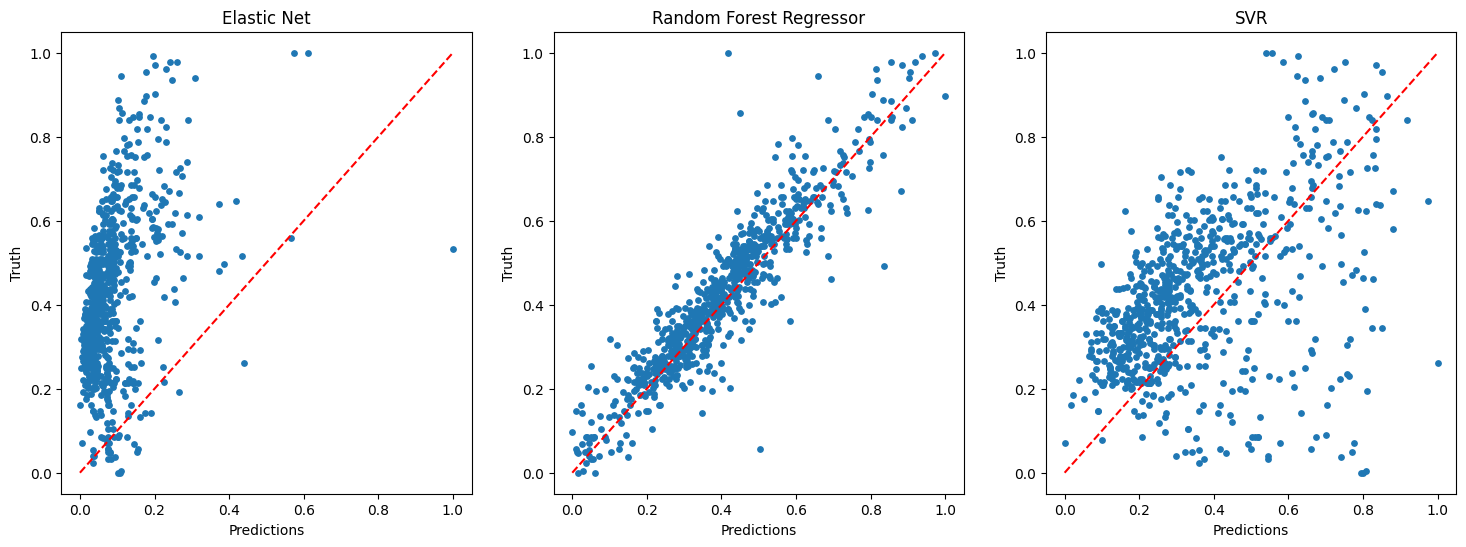

In [1530]:
sale_evaluator.p_p_plot(Vs_test)

##### **Kết luận:** Mô hình thích hợp nhất là **Random Forest Regressor**

#### Cho thuê

Chọn lọc baseline model tốt nhất từ 1 trong 3 mô hình:
1. Elastic Net
2. Random Forest Regressor
3. SVR

In [1531]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

rent_candidates = {
    "Elastic Net": ElasticNet(),
    "Random Forest Regressor": RandomForestRegressor(),
    "SVR": SVR()
}

Huấn luyện các mô hình dựa trên tập dữ liệu Train

In [1532]:
rent_evaluator = SkLearnModelEvaluator(
    rent_candidates,
    rent_features
).fit(Vr_train, y="price")

Các thang đo đánh giá hiệu suất mô hình: $R^2$, MAE, MAPE

In [1533]:
rent_evaluator.eval(
    ("r2", "mae", "mape"),
    Vr_test
)

,r2,mae,mape
model_name,,,
Elastic Net,0.518227,0.152423,0.031987
Random Forest Regressor,0.653355,0.12303,0.025899
SVR,0.558559,0.143517,0.030203


Biểu đồ P-P giữa dự đoán và giá trị thực tế

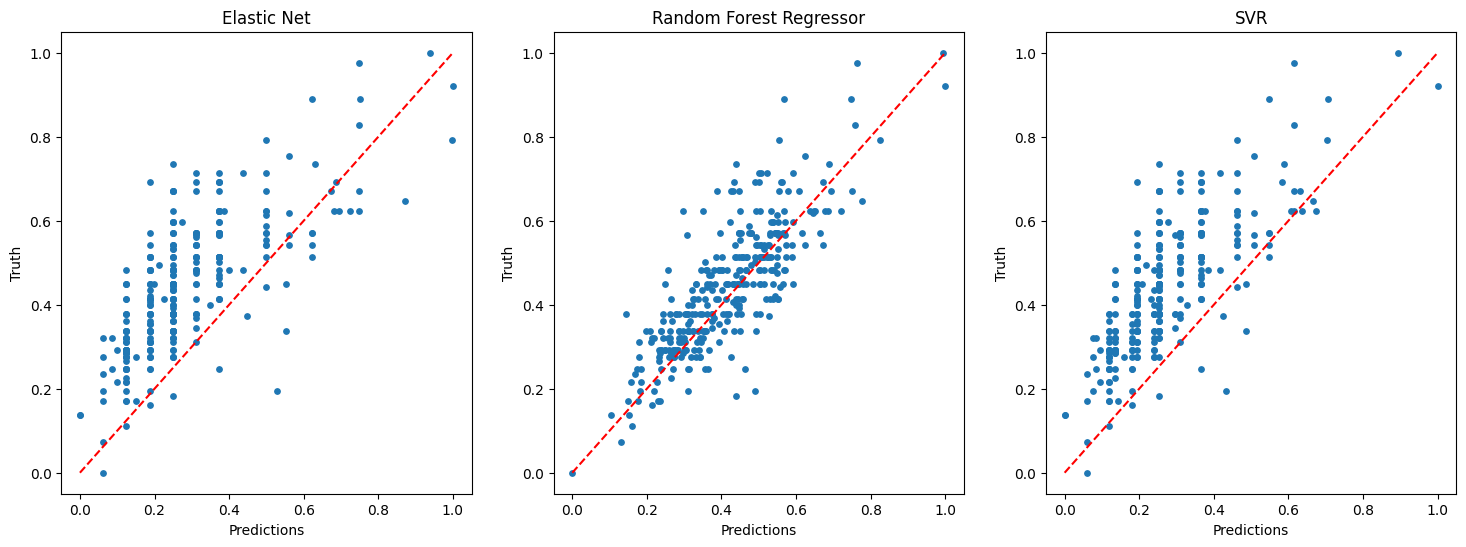

In [1534]:
rent_evaluator.p_p_plot(Vr_test)

##### **Kết luận:** Mô hình thích hợp nhất là **Random Forest Regressor**

In [1535]:
sale_model = sale_evaluator["Random Forest Regressor"]
rent_model = rent_evaluator["Random Forest Regressor"]

# sale_model = joblib.load("./sale-forest.pkl")
# rent_model = joblib.load("./rent-forest.pkl")

### Explaining

Tiến hành giải thích mô hình với SHAP [[1]](https://proceedings.neurips.cc/paper_files/paper/2017/hash/8a20a8621978632d76c43dfd28b67767-Abstract.html)

In [1536]:
import shap

Xs_train, ys_train = sale_evaluator.feature_info.transform(Vs_train)
Xr_train, yr_train = rent_evaluator.feature_info.transform(Vr_train)

sale_explainer = shap.TreeExplainer(
    sale_model,
    Xs_train.sample(50)
)
rent_explainer = shap.TreeExplainer(
    rent_model,
    Xr_train.sample(50)
)

In [1537]:
Xs_test, ys_test = sale_evaluator.feature_info.transform(Vs_test)
Xr_test, yr_test = rent_evaluator.feature_info.transform(Vr_test)

sale_SHAP = sale_explainer(Xs_test, check_additivity=False)
rent_SHAP = rent_explainer(Xr_test)

#### Mô hình "Bán"

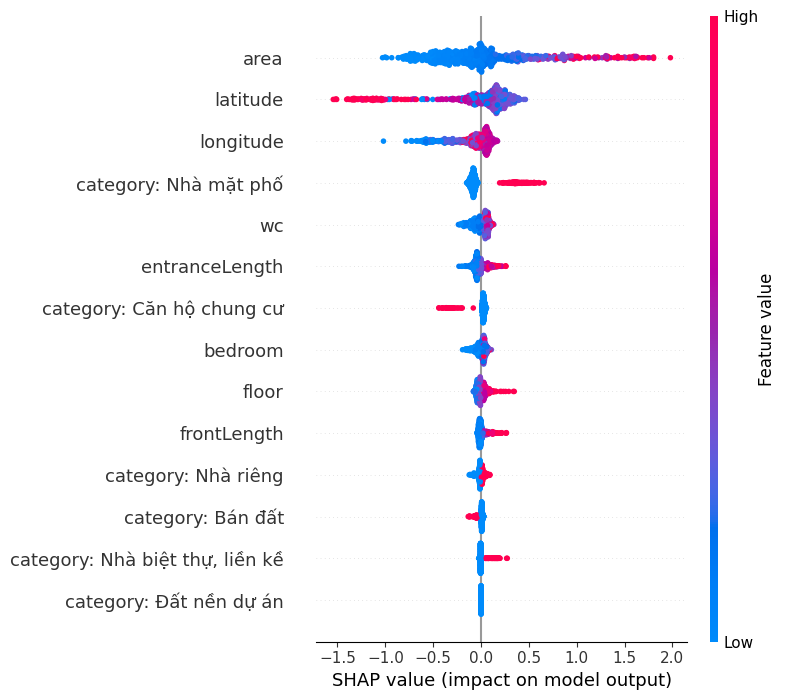

In [1538]:
shap.summary_plot(sale_SHAP)

Một số kết luận rút ra:
1. Các đặc trưng ảnh hưởng nhiều nhất tới mô hình là `area`, `latitude`, `longitude` do giá trị SHAP có phương sai rộng.
2. Diện tích lớn có thể đẩy mạnh giá bđs.
3. Bđs ở khu vực trung tâm có giá cao nhất so với toàn TP.HCM. (Màu tím của `latitude` + màu đỏ tía của `longitude`)
4. Bđs ở khu vực Tây Bắc TP.HCM có giá thấp hơn so với mặt bằng chung (Màu đỏ của `latitude` + màu xanh của `longitude`)
6. `entranceLength`, `wc`, `floor`, `frontLength` càng lớn càng đẩy giá lên cao.

### Mô hình "Cho thuê"

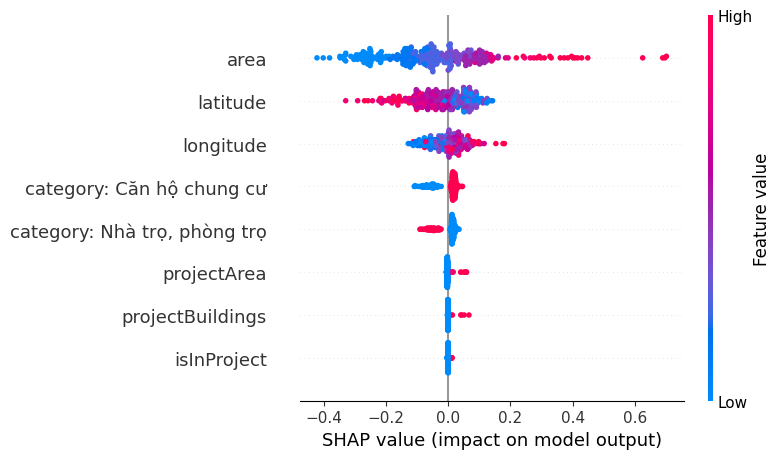

In [1539]:
shap.summary_plot(rent_SHAP)

Một số kết luận rút ra:
1. Các đặc trưng ảnh hưởng nhiều nhất tới mô hình là `area`, `latitude`, `longitude` do giá trị SHAP có phương sai rộng.
2. Diện tích có tỉ lệ thuận với giá cả.
3. Bđs ở khu vực phía Đông có giá cao nhất so với toàn TP.HCM. (Màu tím của `latitude` + màu đỏ của `longitude`)
4. Bđs ở khu vực Tây Bắc TP.HCM có giá thấp hơn so với mặt bằng chung (Màu đỏ của `latitude` + màu xanh của `longitude`)
6. "Căn hộ chung cư" có xu hướng đẩy giá cao hơn so với mặt bằng chung. Ngược lại, "Nhà trọ, phòng trọ" sẽ rẻ hơn.
7. Các bđs thuộc các dự án lớn có giá cao hơn mặt bằng chung (màu đỏ của `projectBuildings`, `projectArea`)

### Mở rộng vấn đề: Kiểm định giá BĐS

Giả sử rằng ở một viễn cảnh trong mơ, ta có được một mô hình tốt đủ để dự đoán giá bđs với sai số thấp. Vấn đề trở thành *semi-supervised anomaly detection*. 

Dựa vào sự hỗ trợ của mô hình dự đoán, ta có thể kết luận rằng một bài đăng tin ra giá sai nếu giá bán:
1. Quá thấp so với dự đoán.
2. Quá cao so với dự đoán.

Vậy, vấn đề trở thành: **Xác định được khoảng sai số có thể chấp nhận của mô hình mà phần lớn trong thực tế sẽ gặp phải.**

Dựa vào mô hình tốt nhất ta tìm được như trên, ta tiến hành xem xét phân phối của sai số dựa vào tập dữ liệu test của mô hình:

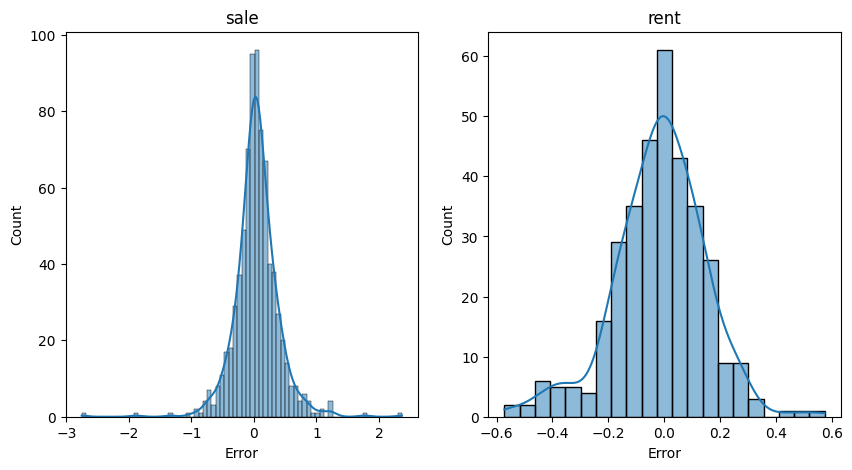

In [1540]:
diffs = {
    "sale": sale_model.predict(Xs_test) - ys_test,
    "rent": rent_model.predict(Xr_test) - yr_test
}

plt.figure(figsize=(10, 5))
for i, (form, diff) in enumerate(diffs.items()):
    plt.subplot(1, 2, i+1)
    plt.title(form)
    sns.histplot(diff, kde=True)
    plt.xlabel("Error")

Từ đồ thị trên, ta thấy được phân phối của sai số có dạng chuông. Ta có thể khẳng định rằng, phân phối của sai số là:
- Student's T (nếu $N \leq 30$)
- Normal (nếu $N > 30$)

Ta giả sử phần lớn ($99\%$) giá của các bài đăng gần với dự đoán sẽ là những bài đăng ra giá thích hợp.

Số ít bài đăng còn lại ($1\%$) sẽ là những bài đăng ra giá ảo.

$\Rightarrow$ Ta có độ tin cậy $c = 99\% \Rightarrow \alpha = 1\%$ 

Gọi độ chính xác: 
$$
m = z \cdot \sigma
$$

Trong đó:
- $z$: z-score của phân phối dựa vào độ tin cậy/mức ý nghĩa.
- $\sigma$: Độ lệch chuẩn của sai số.

Khi đó, khoảng giá chấp nhận được của tin đăng là $[\varepsilon_1, \varepsilon_2]$ với:
- $\varepsilon_1 = \bar\varepsilon - m$
- $\varepsilon_2 = \bar\varepsilon + m$

Trong đó:
- $\bar\varepsilon$: Kì vọng của sai số.
- $\varepsilon_1$: Ngưỡng sai số dưới
- $\varepsilon_2$: Ngưỡng sai số trên

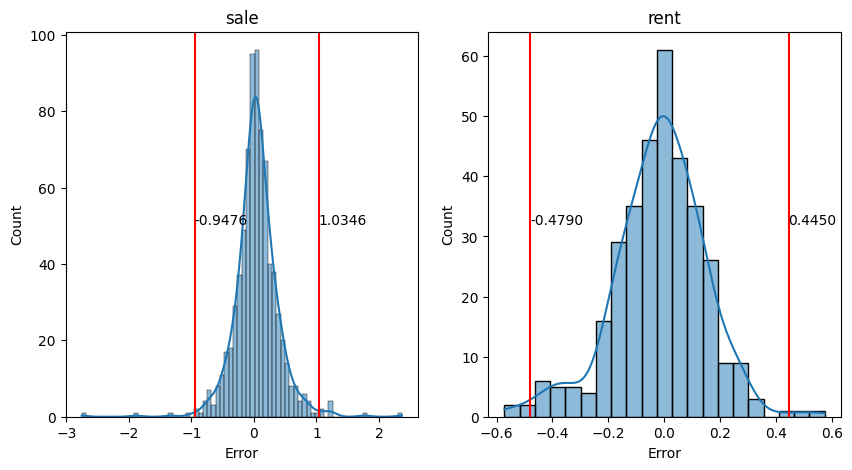

In [1541]:
from scipy import stats
plt.figure(figsize=(10, 5))
for i, (form, diff) in enumerate(diffs.items()):
    plt.subplot(1, 2, i+1)
    plt.title(form)
    c = .995
    alpha = 1 - c
    N = diff.shape[0]
    mean = diff.mean()
    std = diff.std()
    zscore = stats.norm.ppf(c + alpha/2)

    m = zscore * std
    lower_bound, upper_bound = mean-m, mean+m

    sns.histplot(diff, kde=True)
    plt.xlabel("Error")

    mean_ylim = np.mean(plt.ylim())
    plt.axvline(lower_bound, color="r")
    plt.text(lower_bound, mean_ylim, f"{lower_bound:.4f}")
    plt.axvline(upper_bound, color="r")
    plt.text(upper_bound, mean_ylim, f"{upper_bound:.4f}")

### Testing

#### Thử nghiệm lên bộ dữ liệu chưa xác thực

Tách dataset **U** (unverified - Chưa xác thực) đã được chuẩn bị thành:
1. **Us**: Bán
2. **Ur**: Cho t

##### Bán

In [1542]:
Us, Ur = sale_rent_split(U_df)

In [1543]:
sale_evaluator.eval(metrics=("r2", "mae", "mape"), data=Us)

,r2,mae,mape
model_name,,,
Elastic Net,0.170037,0.88555,30965617059562.347656
Random Forest Regressor,0.841459,0.36517,1664762590120.105713
SVR,0.453406,0.757945,29922285754367.277344


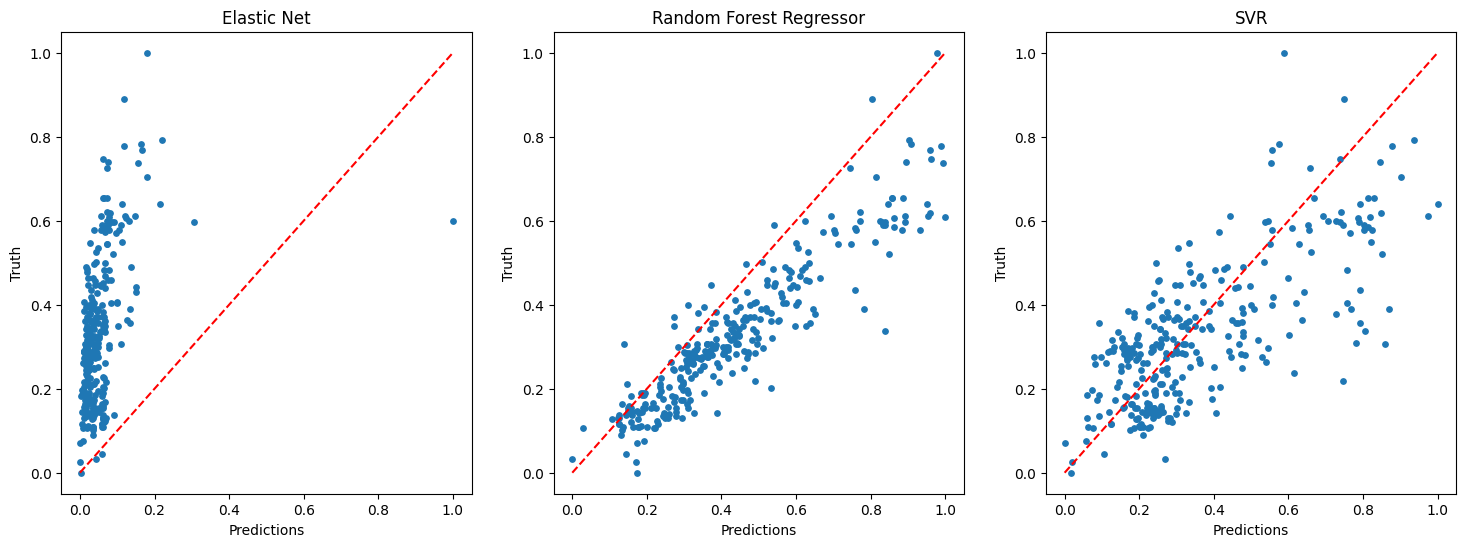

In [1544]:
sale_evaluator.p_p_plot(Us)

##### Cho thuê

In [1545]:
rent_evaluator.eval(metrics=("r2", "mae", "mape"), data=Ur)

,r2,mae,mape
model_name,,,
Elastic Net,0.450329,0.367999,0.070928
Random Forest Regressor,0.576402,0.316641,0.062526
SVR,0.469488,0.350643,0.06752


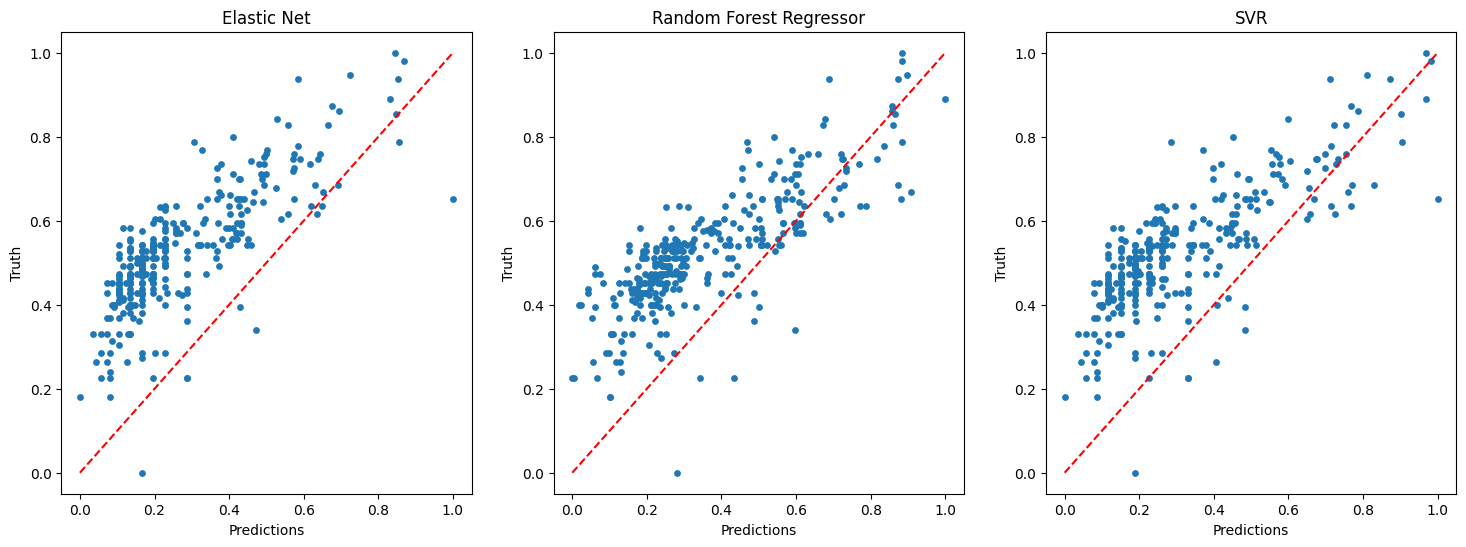

In [1546]:
rent_evaluator.p_p_plot(Ur)

Sai số của mô hình "Cho thuê" cao hơn với những tin chưa xác thực

#### Tìm ngưỡng sai số

In [1547]:
class ErrorTester:
    '''
    Thực hiện phép kiểm định dựa vào mô hình và tập dữ liệu cho trước.
    '''
    def __init__(
        self,
        model: RegressorMixin,
        feature_info: Features
    ) -> None:
        self.model = model
        self.feature_info = feature_info
    
    def fit(
        self,
        data: pd.DataFrame,
        c: float = .99
    ):
        self.diff = self._compute_diff(data)
        self.c = c
        self.alpha = 1 - c
        self.N: int = data.shape[0]
        self.mean: float = self.diff.mean()
        self.std: float = self.diff.std()

        if self.N > 30:
            self.zscore: float = stats.norm.ppf(self.c + self.alpha/2)
        else: self.zscore: float = stats.t.ppf(self.c + self.alpha/2)
        
        self.m = self.zscore * self.std
        self.lower_bound, self.upper_bound = self.mean-self.m, self.mean+self.m

        return self
    
    def predict(self, df: pd.DataFrame):
        X, y = self.feature_info.transform(df)
        return self.model.predict(X)

    def test(
        self,
        data: pd.DataFrame
    ):
        if self.lower_bound is None or self.upper_bound is None:
            raise ValueError(f"No lower_bound and upper_bound attrs found. Call fit(data) to compute them first")
        
        errors = self._compute_diff(data)
        return (self.lower_bound < errors) & (errors < self.upper_bound)
    
    def plot_fitted(self, kde=True, plot_bound=True):
        sns.histplot(self.diff, kde=kde)
        if plot_bound:
            plt.axvline(self.lower_bound, c="r")
            plt.axvline(self.upper_bound, c="r", label="Bounds")
            plt.text(self.lower_bound, np.mean(plt.ylim()), f"{self.lower_bound:.2f}")
            plt.text(self.upper_bound, np.mean(plt.ylim()), f"{self.upper_bound:.2f}")
            plt.xlabel("Error")
        plt.legend(loc="best")
    
    def _compute_diff(
        self, 
        data: pd.DataFrame
    ):
        X, y = self.feature_info.transform(data)
        preds = self.model.predict(X)
        return preds - y

#### Bán
Tạo object `sale_tester` dành cho việc kiểm định

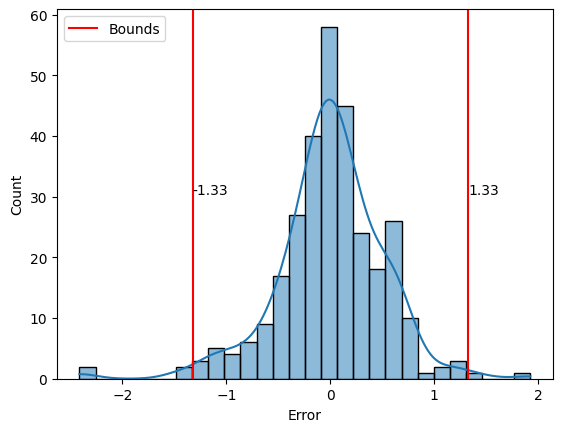

In [1548]:
sale_tester = ErrorTester(
    model=sale_model,
    feature_info=sale_features
).fit(Us)
sale_tester.plot_fitted()

#### Cho thuê
Tạo object `rent_tester` dành cho việc kiểm định

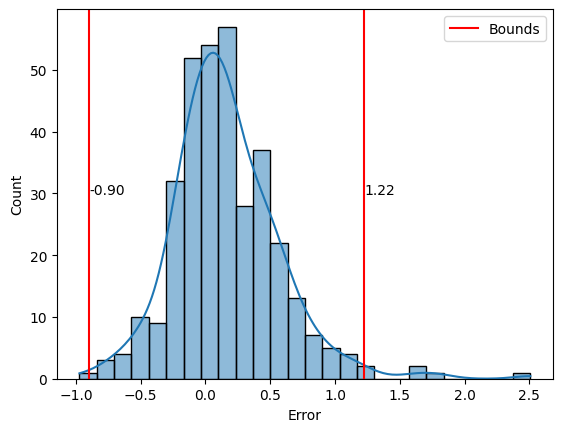

In [1549]:
rent_tester = ErrorTester(
    model=rent_model,
    feature_info=rent_features
).fit(Ur)
rent_tester.plot_fitted()